In [2]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

Exercise: At http://www.coindesk.com you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

In [9]:
#oriCsv= 'coindesk-bpi-USD-close.csv'
ryCsv=  'BCH_USD_2019-07-03_2020-07-02-CoinDesk.csv'


In [10]:
df = pd.read_csv(ryCsv) #, nrows=1625, parse_dates=[0])
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BCH,2019-07-03,408.299894,412.217724,421.920458,381.098582
1,BCH,2019-07-04,419.798546,408.079559,421.829026,403.002736
2,BCH,2019-07-05,413.611717,419.800106,423.303361,411.516113
3,BCH,2019-07-06,399.970847,399.721405,410.378345,391.386836
4,BCH,2019-07-07,407.282882,399.970475,419.118975,397.919617


In [11]:
df.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [12]:
ys = df['Closing Price (USD)'].values
ts = np.arange(len(ys)) #df['Date'].values

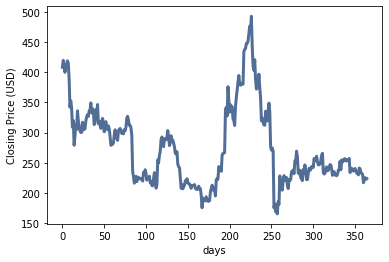

In [13]:
wave = thinkdsp.Wave(ys, ts, framerate=1)
wave.plot()
thinkplot.config(ylabel='Closing Price (USD)')
thinkplot.config(xlabel='days') #'Time (days)')

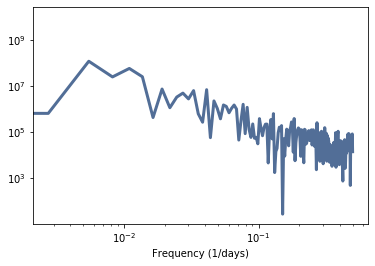

In [14]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (1/days)',
                 xscale='log', yscale='log')

In [15]:
spectrum.estimate_slope()

LinregressResult(slope=-1.6165443622802405, intercept=8.277140456237351, rvalue=-0.7383138868007836, pvalue=1.3040348238698387e-32, stderr=0.11006893791153169)

Exercise: A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.

Write a class called UncorrelatedPoissonNoise that inherits from thinkdsp._Noise and provides evaluate. It should use np.random.poisson to generate random values from a Poisson distribution. The parameter of this function, lam, is the average number of particles during each interval. You can use the attribute amp to specify lam. For example, if the framerate is 10 kHz and amp is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of amp, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise.


In [16]:
class UncorrelatedPoissonNoise(thinkdsp._Noise):
    """Represents uncorrelated Poisson noise."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        ys = np.random.poisson(lam= self.amp, size= len(ts))
        return ys

In [17]:
#np.random.poisson??
import numpy as np
import scipy.stats as st

#np.random.seed(1)
X1= np.random.poisson(lam= 10,size= 100)

#np.random.seed(0)
X2= st.poisson.rvs(mu= 10, size= 100)



X1.mean(), X1.var(), \
X2.mean(), X2.var(), \
X1, X2

(9.53,
 8.989100000000002,
 9.91,
 10.301900000000003,
 array([17,  7, 10,  5,  4, 10,  8, 12, 11, 10,  9, 10, 13,  9,  8, 11,  3,
        12, 13, 13,  8, 10, 11, 14, 10,  9,  9,  7,  4, 10, 10, 10, 13,  7,
         8, 12, 11,  9,  6, 14,  6, 10, 16,  7, 13,  9, 10, 10,  7, 15,  9,
         5, 10, 10, 12,  7, 11, 13,  5,  5,  7,  7,  7,  5, 15, 17,  7, 10,
         9,  8,  9, 11, 10, 10,  7, 12, 15, 11,  7, 10,  7,  7,  8,  8, 17,
         9,  9, 10,  6, 10,  7,  7, 10, 12, 14, 12,  6, 11,  6,  6]),
 array([21, 12, 11,  9, 12,  4, 10,  9, 11,  7, 11, 18,  9,  6,  8, 10,  8,
        11, 10, 11,  7,  9,  5,  9, 11, 10, 14, 11,  6, 10,  8, 10,  8,  9,
         8, 13, 11,  9,  7,  9, 14,  9,  8,  8, 16, 11, 10, 13,  9,  7, 14,
         9,  9, 11,  6,  7,  8,  7, 11, 16,  7,  7, 12, 12,  7, 14, 10,  3,
        13,  8,  6, 14, 18, 10,  8, 10, 10,  9, 15, 13,  5, 15, 13, 14,  5,
        10, 14, 13,  3,  7, 11,  7,  9, 11, 11,  5, 12,  8,  9,  8]))

In [18]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

In [19]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 6


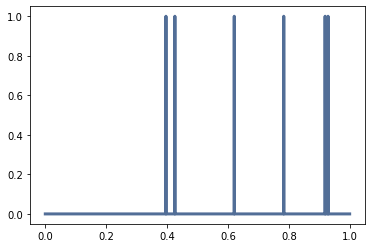

In [20]:
wave.plot()

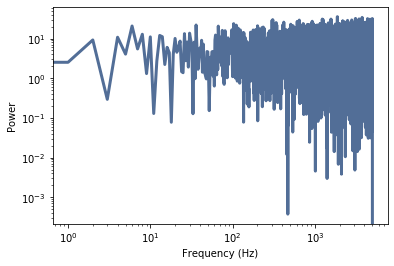

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Power',
                 xscale='log', 
                 yscale='log')

In [22]:
spectrum.estimate_slope().slope

nan

In [23]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

(0, 0.1)

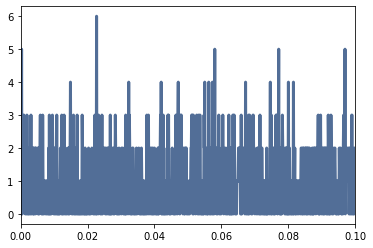

In [24]:
import matplotlib.pylab as pl

wave.plot()

pl.xlim([0,.1])

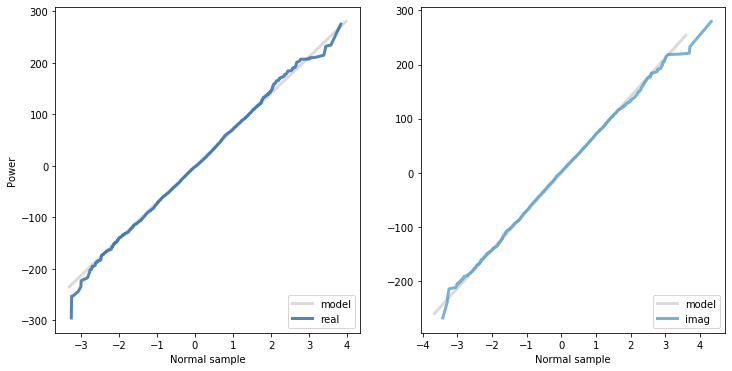

In [25]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

thinkplot.preplot(2, cols=2)
thinkstats2.NormalProbabilityPlot(spectrum.real, label='real')
thinkplot.config(xlabel='Normal sample',
                 ylabel='Power',
                 legend=True,
                 loc='lower right')

thinkplot.subplot(2)
thinkstats2.NormalProbabilityPlot(spectrum.imag, label='imag')
thinkplot.config(xlabel='Normal sample',
                     loc='lower right')

Exercise: The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. There are more efficient alternatives, like the Voss-McCartney algorithm. Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.


In [26]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.9456927 , 0.38411055, 0.10949596, 0.54122457, 0.61993288],
       [0.04645303,        nan,        nan,        nan,        nan],
       [0.13064384,        nan,        nan,        nan,        nan],
       [0.39475625,        nan,        nan,        nan,        nan],
       [0.16152242,        nan,        nan,        nan,        nan],
       [0.06554664,        nan,        nan,        nan,        nan]])

In [27]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([2, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 2, 4, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 4,
       3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 2, 4, 3, 1,
       2, 1, 1, 3, 1, 1, 1, 2, 2, 2, 4, 1])

In [28]:
rows = np.random.randint(nrows, size=n)
rows

array([91, 72, 40, 24, 81, 39, 43, 55, 54, 40,  7, 68, 97,  5, 62, 59, 61,
       53, 86, 65, 27, 89, 58, 79, 44, 14, 86, 39, 66, 14, 99, 32, 52,  3,
       50, 14, 42, 93, 58, 33, 25, 47, 73, 97, 34, 85, 83,  5,  4, 18, 63,
       20, 54, 81, 61, 47, 17, 44, 98, 17,  8, 82, 46, 82, 35, 60,  4, 40,
       24, 35, 45, 41, 29, 10, 30,  6, 96, 63, 68,  1, 91, 37, 95, 78, 53,
       60, 71, 43, 74, 25, 84, 66, 54, 25, 89, 72, 68, 80, 41, 64])

In [29]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.9456927 , 0.38411055, 0.10949596, 0.54122457, 0.61993288],
       [0.04645303, 0.39763018,        nan,        nan,        nan],
       [0.13064384,        nan,        nan,        nan,        nan],
       [0.39475625,        nan, 0.97689464,        nan,        nan],
       [0.16152242, 0.57187121,        nan,        nan,        nan],
       [0.06554664, 0.28630482,        nan,        nan,        nan]])

In [30]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.945693,0.384111,0.109496,0.541225,0.619933
1,0.046453,0.397630,NaN,NaN,NaN
2,0.130644,NaN,NaN,NaN,NaN
3,0.394756,NaN,0.976895,NaN,NaN
4,0.161522,0.571871,NaN,NaN,NaN


In [31]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.945693,0.384111,0.109496,0.541225,0.619933
1,0.046453,0.397630,0.109496,0.541225,0.619933
2,0.130644,0.397630,0.109496,0.541225,0.619933
3,0.394756,0.397630,0.976895,0.541225,0.619933
4,0.161522,0.571871,0.976895,0.541225,0.619933


In [32]:
total = filled.sum(axis=1)
total.head()

0    2.600457
1    1.714737
2    1.798927
3    2.930439
4    2.871446
dtype: float64

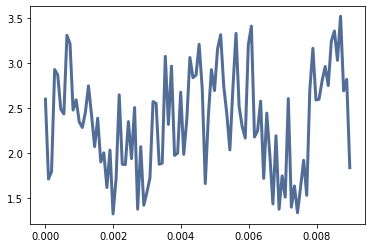

In [33]:
wave = thinkdsp.Wave(total.values)
wave.plot()

In [34]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [35]:
ys = voss(11025)
ys

array([9.65756394, 9.13426696, 9.22137208, ..., 8.08555247, 8.23159126,
       7.75360312])

In [36]:
wave = thinkdsp.Wave(ys)
wave.unbias()
wave.normalize()

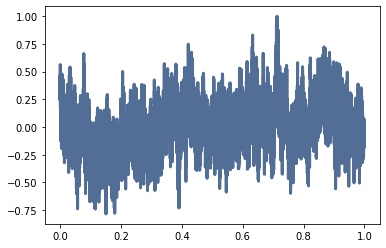

In [37]:
wave.plot()

In [38]:
wave.make_audio()

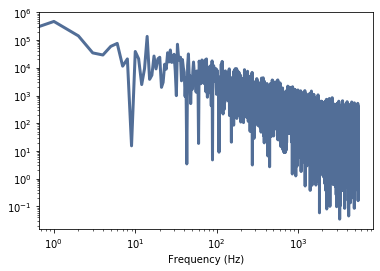

In [39]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

In [40]:
spectrum.estimate_slope().slope

-0.9975807723164791

In [41]:
seg_length = 64 * 1024
iters = 100
wave = thinkdsp.Wave(voss(seg_length * iters))
len(wave)

6553600

In [42]:
spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

32769

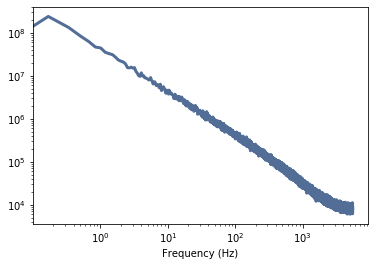

In [43]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

In [44]:
spectrum.estimate_slope().slope

-1.0020788323957395